In [21]:
from database.adatabase import ADatabase
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
sapling = ADatabase("sapling")

In [23]:
sapling.connect()
trades = sapling.retrieve("positions")
sapling.disconnect()

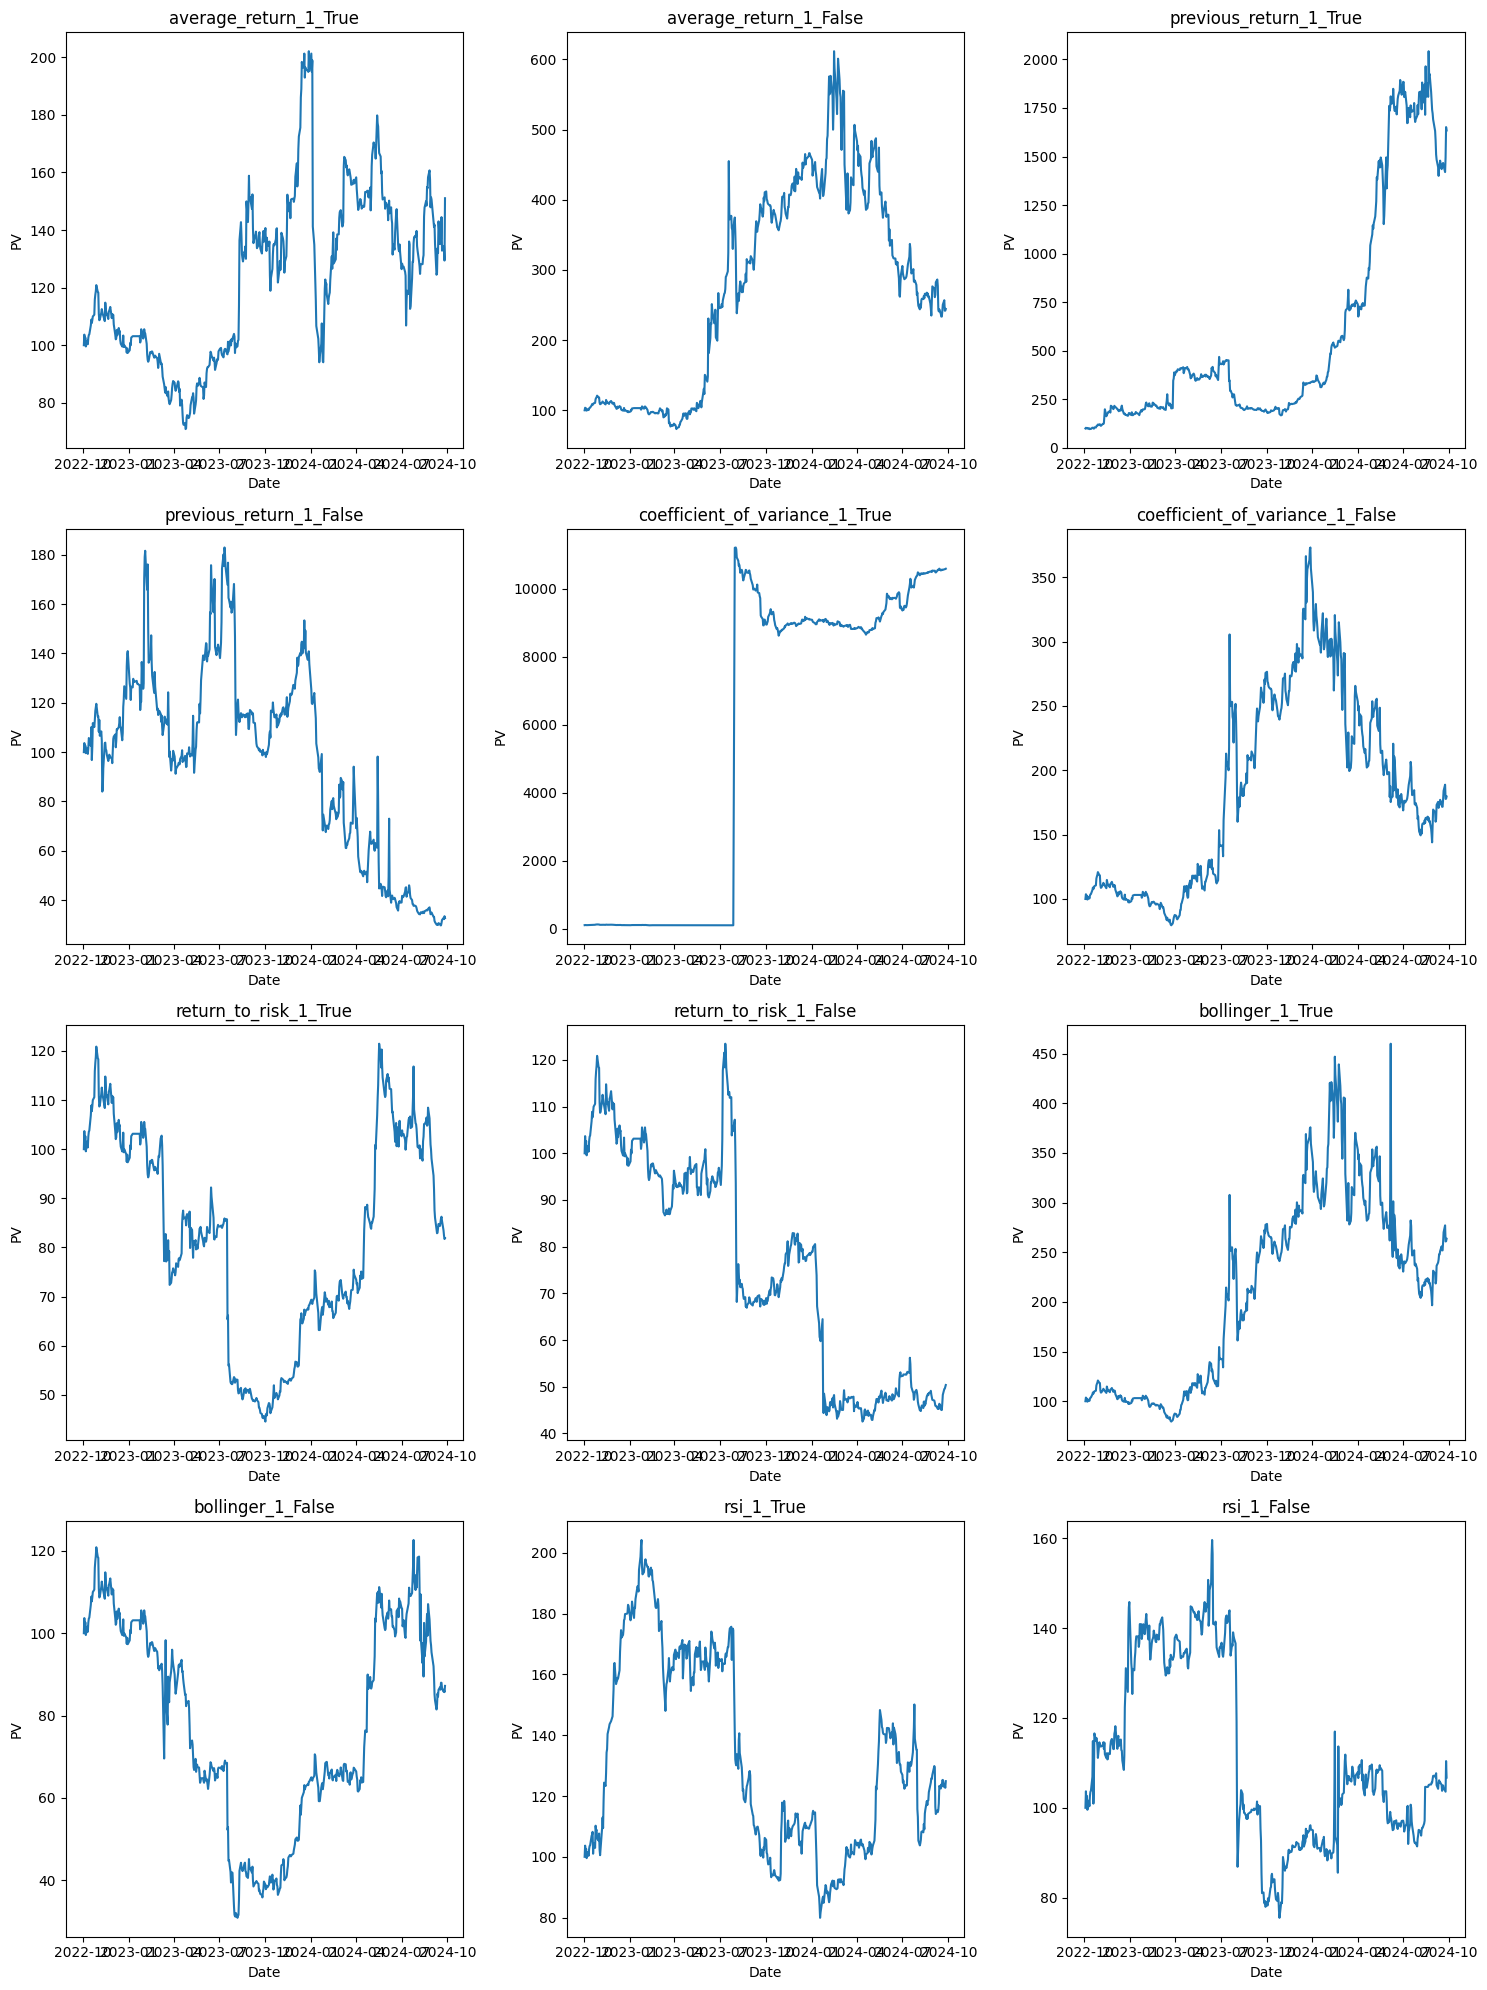

In [24]:
analysis = []

# Assuming trades DataFrame is already defined
trades["pv"] = trades["adjclose"] * trades["quantity"]

# Get unique values
names = trades["name"].unique()
positions = [1]
booleans = [True, False]

# Calculate the number of plots
num_plots = len(names) * len(positions) * len(booleans)
num_columns = 3
num_rows = -(-num_plots // num_columns)  # Ceiling division

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 5))

# Flatten the axes array for easier indexing
axes = axes.flatten()

plot_index = 0
for name in names:
    for position in positions:
        for boolean in booleans:
            portfolio = trades.pivot_table(index=["date", "name", "positions", "boolean"], 
                                           columns="position", values="pv").reset_index()
            portfolio = portfolio[(portfolio["name"] == name) & 
                                  (portfolio["positions"] == position) & 
                                  (portfolio["boolean"] == boolean)]
            if position == 1:
                portfolio["pv"] = portfolio[0]
            else:
                portfolio["pv"] = [sum([row[1][i] for i in range(trades["position"].max())]) 
                                   for row in portfolio.iterrows()]
            stuff = {}
            stuff["name"] = name
            stuff["position"] = position
            stuff["boolean"] = boolean
            stuff["pv"] = portfolio["pv"].iloc[-1].item()
            stuff["std"] = portfolio["pv"].std()
            analysis.append(stuff)
            # Plotting
            ax = axes[plot_index]
            ax.plot(portfolio["date"].values, portfolio["pv"].values)
            ax.set_title(f"{name}_{position}_{boolean}")
            ax.set_xlabel('Date')
            ax.set_ylabel('PV')
            
            plot_index += 1

# Hide any unused axes
for i in range(plot_index, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


In [25]:
a = pd.DataFrame(analysis)
a["risk_to_return"] = a["pv"] / a["std"]
a.sort_values("pv",ascending=False)

,name,position,boolean,pv,std,risk_to_return
4,coefficient_of_variance,1,True,10583.944364,4653.377671,2.274465
2,previous_return,1,True,1633.980099,568.979998,2.871771
8,bollinger,1,True,263.573647,95.684405,2.754614
1,average_return,1,False,244.413303,145.929813,1.674869
5,coefficient_of_variance,1,False,179.606818,74.511472,2.410459
0,average_return,1,True,151.053063,28.641161,5.273985
10,rsi,1,True,124.883530,31.550689,3.958187
11,rsi,1,False,106.722571,19.837910,5.379728
9,bollinger,1,False,87.208147,24.891085,3.503590
6,return_to_risk,1,True,81.872640,21.177647,3.865993


In [26]:
trade_analysis = trades[(trades["name"]=="coefficient_of_variance") & (trades["positions"]==1) & (trades["boolean"]==True)]
trade_analysis["return"] = (trade_analysis["adjclose"] - trade_analysis["buy_price"]) / trade_analysis["buy_price"]

C:\Users\eric\AppData\Local\Temp\ipykernel_6296\1990832910.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_analysis["return"] = (trade_analysis["adjclose"] - trade_analysis["buy_price"]) / trade_analysis["buy_price"]


In [27]:
trade_analysis.sort_values("return",ascending=False)

,side,type,time_in_force,symbol,notional,adjclose,quantity,buy_date,buy_price,date,position,name,positions,boolean,pv,return
2015,buy,market,day,PLD,110.58,106.59,1.133921,2022-10-24,97.52,2022-10-28,0,coefficient_of_variance,1,True,120.864666,0.093007
2014,buy,market,day,PLD,110.58,104.73,1.133921,2022-10-24,97.52,2022-10-27,0,coefficient_of_variance,1,True,118.755572,0.073934
2413,buy,market,day,TMUS,9192.59,174.39,56.479418,2024-05-20,162.76,2024-05-31,0,coefficient_of_variance,1,True,9849.445626,0.071455
2013,buy,market,day,PLD,110.58,103.65,1.133921,2022-10-24,97.52,2022-10-26,0,coefficient_of_variance,1,True,117.530937,0.062859
2027,buy,market,day,DOCS,108.37,32.78,3.501454,2022-11-14,30.95,2022-11-15,0,coefficient_of_variance,1,True,114.777661,0.059128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,buy,market,day,BLDR,118.47,57.71,1.921343,2022-10-31,61.66,2022-11-02,0,coefficient_of_variance,1,True,110.880696,-0.064061
2239,buy,market,day,PLD,9867.96,111.18,82.840497,2023-09-18,119.12,2023-09-21,0,coefficient_of_variance,1,True,9210.206454,-0.066655
2240,buy,market,day,PLD,9867.96,110.71,82.840497,2023-09-18,119.12,2023-09-22,0,coefficient_of_variance,1,True,9171.271420,-0.070601
2020,buy,market,day,BLDR,118.47,56.68,1.921343,2022-10-31,61.66,2022-11-04,0,coefficient_of_variance,1,True,108.901713,-0.080765
